In [130]:
#import packages
from scipy import constants #necessary physical constants
import pandas as pd #read the data
import matplotlib.pyplot as plt #plot the data
import os #navigate through files

In [148]:
#device properties
device_surface_A = constants.pi*(100*1E-4)**2 #[cm**2], circular diodes of 100um radius
eps_GaAs = 12.9 #dielectric constant of GaAs
omega = 2*constants.pi*1E6 #measurement frequency of 1 MHz

In [149]:
#read the data into a data frame function
def data_prep(file):
    df = pd.read_csv(file,sep='\t',header=None,names=["Voltage","C (pF)","G (uS)"],skiprows=1) #tab separated file with empty first row
    df['C (F/cm2)'] = df['C (pF)']*1E-12/device_surface_A #capacitance density
    df['N_CV (cm-3)'] = (-2/(constants.e*eps_GaAs*(constants.epsilon_0/100)))*(((df['C (F/cm2)'])**-2).diff()/df['Voltage'].diff())**-1 #carrier concentration
    df['W (nm)'] = eps_GaAs*(constants.epsilon_0/100)/df['C (F/cm2)']*1e7 #calculate depletion width in nm, /100 for m->cm , 1E7 for cm->nm
    df['Q'] = omega*df['C (pF)']/df['G (uS)']*1E-6 #Calculate Quality factor, 1E6 corrects for pF and uS
    df.loc[df['Q']>=3.0] #now only keep the CV for which we trust the Q factor
    return df
#perform calculations on data frame

In [152]:
example_file = "data/GaAs/2159_MS48_H2_CV_293K_2.dat"
example_data = data_prep(example_file)
#print(data)

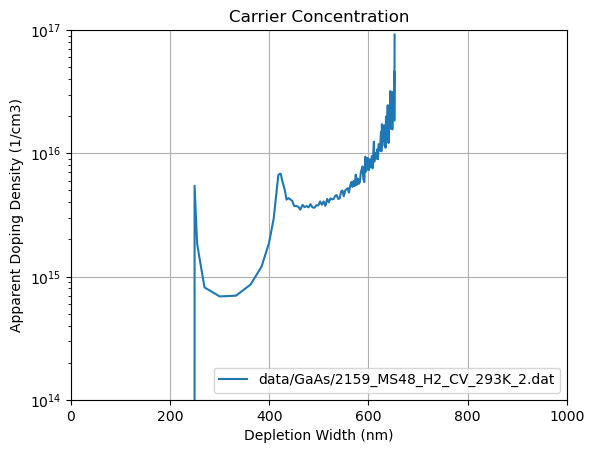

In [158]:
#plot the data frame function
def plot_CC(df,name):
    #plt.figure()
    plt.plot(df['W (nm)'], df['N_CV (cm-3)'],label=name)
    plt.xlabel('Depletion Width (nm)')
    plt.ylabel('Apparent Doping Density (1/cm3)')
    plt.yscale('log')
    plt.grid()
    plt.xlim([0,1000])
    plt.ylim([1E14,1E17])
    plt.title('Carrier Concentration')
    plt.legend()
plot_CC(example_data,example_file)

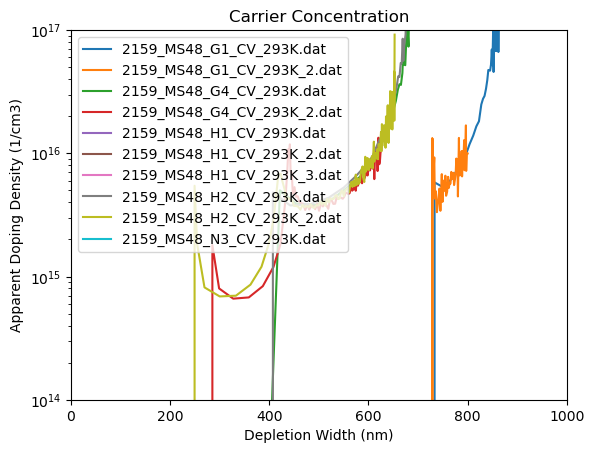

In [161]:
#plot all available data, plot measurement groups
samples = os.listdir('data')
#samples = ['GaAs']
for sample in samples:
    measruements = os.listdir('data'+'/'+sample)
    for measruement in measruements:
        data = data_prep('data'+'/'+sample+'/'+measruement)
        plot_CC(data,measruement)


In [ ]:
#TODO
#plot by measurement groups, dict?
#plot nicer, like in origin